In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions
import math
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import burr
import matplotlib.pyplot as plt

In [9]:
with open(r'../../data/tidy/Shrewsbury_network_selco_added_length.csv') as Shrewsbury_length:
    df_Shrewsbury_length=pd.read_csv(Shrewsbury_length)

In [10]:
 df_Shrewsbury_length.columns

Index(['gid', 'phasedesig', 'servicetyp', 'subtype', 'length1', 'length 2',
       'length', 'geometry'],
      dtype='object')

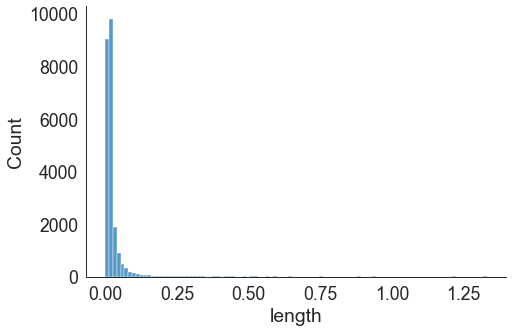

In [11]:
# plotting histogram for length
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=df_Shrewsbury_length, x="length", kind="hist", bins = 100, aspect = 1.5) 
plt.savefig(r'../../figures/Shrewsbury_length.png',bbox_inches='tight')

,sumsquare_error,aic,bic,kl_div
lognorm,169.061372,2262.291215,-112897.636136,inf
beta,200.858143,6204.311345,-108925.908090,inf
burr,258.965520,1132.286400,-103084.748683,inf
norm,774.659441,60207.080221,-77916.225591,inf
gamma,1594.714161,647.444636,-61308.242567,inf


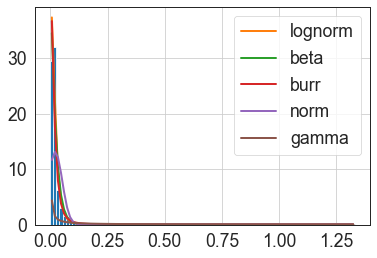

In [12]:
length=df_Shrewsbury_length['length'].values
f = Fitter(length,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()

,sumsquare_error,aic,bic,kl_div
lognorm,169.061372,2262.291215,-112897.636136,inf


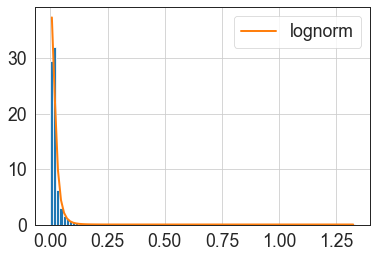

In [13]:
length=df_Shrewsbury_length['length'].values
f = Fitter(length,
           distributions=['lognorm'])
f.fit()
f.summary()

,sumsquare_error,aic,bic,kl_div
gamma,1594.714161,647.444636,-61308.242567,inf


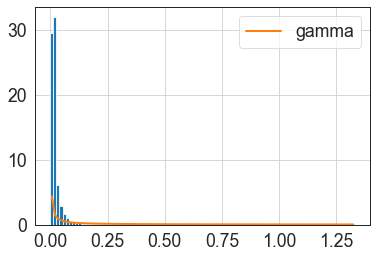

In [14]:
length=df_Shrewsbury_length['length'].values
f = Fitter(length,
           distributions=['gamma'])
f.fit()
f.summary()

In [7]:
f.get_best(method ='sumsquare_error')

{'lognorm': {'s': 0.7110976343812614,
  'loc': -0.00390991157224607,
  'scale': 0.019175671127197043}}

In [8]:
f.fitted_param['lognorm']

(0.7110976343812614, -0.00390991157224607, 0.019175671127197043)

In [9]:
# calculating mean_length of line segments in Shrewsbury network
df_Shrewsbury_length['length3'].values.mean()

0.0214175656864451

In [10]:
df_Shrewsbury_length['length3'].values.sum()

492.347

In [11]:
len(df_Shrewsbury_length['length3'])

22988

In [22]:
#calculating length of UG lines
df_Shrewsbury_length['length3'].values
df=df_Shrewsbury_length.loc[df_Shrewsbury_length.servicetyp=="UG"]
df['length3'].values.sum()

181.14400000000003

In [24]:
#calculating length of OH lines
df_Shrewsbury_length['length3'].values.sum()-df['length3'].values.sum()

311.203